# *Analysis*
- There is a relatively strong correlation between latitude and temperature. 
- The higher latitudes have lower temperatures and the lower latitudes have higher temperatures.
- The correlation between humidity and latitude is very weak.
- There is almost no correlation between cloudiness and latitude.
- The correlation between latitude and wind speed is very weak.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import api_key
import requests
import time

In [3]:
# Generating random Latitude and Longitude
lat = np.random.uniform(low=-90.0, high=90.0, size=1500)
lng = np.random.uniform(low=-180.0, high=180.0, size=1500)
# Creating Dataframe
selected_cities = pd.DataFrame({"Latitude": lat, "Longitude": lng})
selected_cities.head()

,Latitude,Longitude
0,-54.177866,140.932586
1,78.488880,-135.729885
2,6.017698,-105.342129
3,65.077074,-30.670202
4,-83.427057,-169.138367


In [137]:
# Full Dataframe with all the required columns
selected_cities["City"] = ""
selected_cities["Country"] = ""
selected_cities["Date"] = ""
selected_cities["Temperature (F)"] = ""
selected_cities["Humidity (%)"] = ""
selected_cities["Cloudiness (%)"] = ""
selected_cities["Wind Speed (mph)"] = ""
selected_cities.head()

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,34.188907,-171.394363,,,,,,,
1,-69.620002,7.069853,,,,,,,
2,65.159310,-63.683458,,,,,,,
3,-24.672578,127.655885,,,,,,,
4,41.880571,5.974069,,,,,,,


In [ ]:
print("Beginning Data Retrieval")
print("-----------------------------------")
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
for index, row in selected_cities.iterrows():
    try:
        random_lat = row["Latitude"]
        random_long = row["Longitude"]
        city = citipy.nearest_city(random_lat, random_long)
        cityname = city.city_name
        country_name = city.country_code
        
        query_url = url + "appid=" + api_key + "&units=" + units + "&q=" + cityname + "," + country_name
        
        print(f"Processing Record {count} | {cityname}, {country_name}")
        print(query_url)
        print("------------------------------------------------------------")
        
        response = requests.get(query_url).json()
              
        temperature = response["main"]["temp_max"]
        humidity = response["main"]["humidity"]
        cloudiness = response["clouds"]["all"]
        wind_speed = response["wind"]["speed"]
        new_lat = response["coord"]["lat"]
        new_long = response["coord"]["lon"]
        
        selected_cities.set_value(index, "City", cityname)
        selected_cities.set_value(index, "Country", country_name)
        selected_cities.set_value(index, "Temperature (F)", pd.to_numeric(temperature))
        selected_cities.set_value(index,"Humidity (%)", humidity)
        selected_cities.set_value(index,"Cloudiness (%)", cloudiness)
        selected_cities.set_value(index,"Wind Speed (mph)", wind_speed)
        
        #probably unnecessary, but replacing previous coordinates with city coordinates for accuracy
        selected_cities.set_value(index, "Longitude", new_lat)
        selected_cities.set_value(index, "Longitude", new_long)
    except:
        print("Invalid entry!")
    
    count = count + 1
    
print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")

In [139]:
# printing the final dataframe
selected_cities.head()

,Latitude,Longitude,City,Country,Date,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,34.188907,-159.32,kapaa,us,,75.2,88,90,13.87
1,-69.620002,19.24,hermanus,za,,51.38,94,92,12.77
2,65.159310,-65.72,pangnirtung,ca,,25.73,87,88,10.98
3,-24.672578,130.99,yulara,au,,69.8,11,0,9.17
4,41.880571,5.88,la seyne-sur-mer,fr,,64.4,88,0,4.94


In [140]:
# delete repeated city, country and find unique city count
selected_cities.drop_duplicates(subset=["City","Country"], inplace=True)
len(selected_cities)

539

# Temperature (F) vs. Latitude

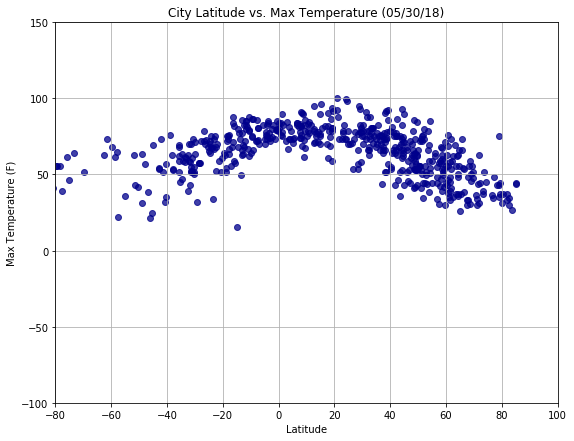

In [157]:
# Temperature (F) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(selected_cities['Latitude'], pd.to_numeric(selected_cities['Temperature (F)']), marker='o', facecolor='darkblue',alpha = 0.75)

plt.title("City Latitude vs. Max Temperature (05/30/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-100,150)
plt.savefig("Temperature.png")
plt.show()

# Humidity (%) vs. Latitude

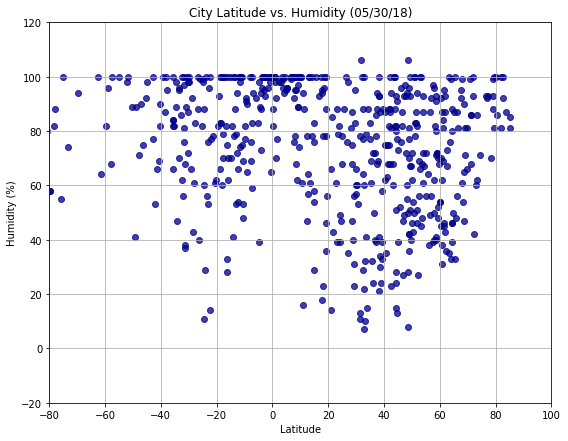

In [158]:
# Humidity (%) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(selected_cities['Latitude'],pd.to_numeric(selected_cities['Humidity (%)']),marker='o',facecolor='darkblue', alpha = 0.75)

plt.title("City Latitude vs. Humidity (05/30/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.savefig("Humidity.png")
plt.show()

# Cloudiness (%) vs. Latitude

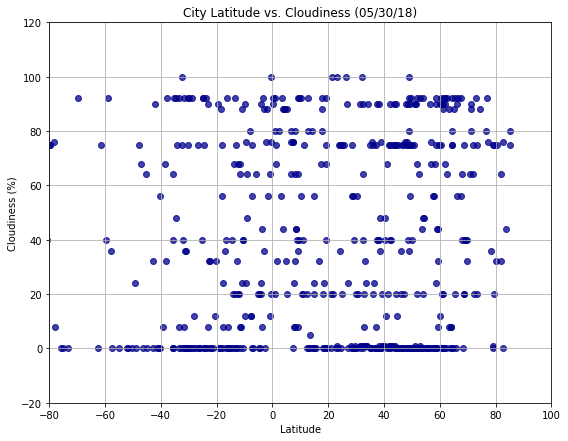

In [159]:
# Cloudiness (%) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(selected_cities['Latitude'],pd.to_numeric(selected_cities['Cloudiness (%)']),marker='o',facecolor='darkblue', alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (05/30/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-20,120)
plt.savefig("Cloudiness.png")
plt.show()

# Wind Speed (mph) vs. Latitude

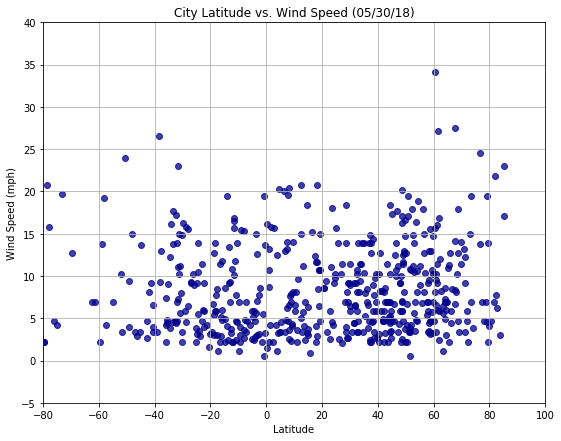

In [160]:
# Wind Speed (mph) vs. Latitude
plt.figure(figsize=(9,7))
plt.scatter(selected_cities['Latitude'],pd.to_numeric(selected_cities['Wind Speed (mph)']),marker='o',facecolor='darkblue', alpha = 0.75)


plt.title("City Latitude vs. Wind Speed (05/30/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim(-80,100)
plt.ylim(-5,40)
plt.savefig("Wind_Speed.png")
plt.show()